# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
       
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              


Processing Record 1 of Set 1 | san pedro pochutla
Processing Record 2 of Set 1 | uliastay
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | haiku-pauwela
Processing Record 6 of Set 1 | zhaozhou
Processing Record 7 of Set 1 | hayma'
City not found. Skipping...
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | santiago de cao
Processing Record 11 of Set 1 | qarazhal
Processing Record 12 of Set 1 | la passe
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | cable beach
City not found. Skipping...
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | brisas de zicatela
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | luga
Processing Record 20 of Set 1 | senatobia
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | isafjordur
Processing Reco

City not found. Skipping...
Processing Record 36 of Set 4 | klyuchi
Processing Record 37 of Set 4 | dogondoutchi
Processing Record 38 of Set 4 | petropavlovsk-kamchatsky
Processing Record 39 of Set 4 | brookings
Processing Record 40 of Set 4 | itoman
Processing Record 41 of Set 4 | praia da vitoria
Processing Record 42 of Set 4 | priozersk
Processing Record 43 of Set 4 | serra
Processing Record 44 of Set 4 | monrovia
Processing Record 45 of Set 4 | nuuk
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | okhotsk
Processing Record 48 of Set 4 | baiao
Processing Record 49 of Set 4 | san antonio de pale
Processing Record 0 of Set 5 | bodaybo
Processing Record 1 of Set 5 | papao
Processing Record 2 of Set 5 | nema
Processing Record 3 of Set 5 | magadan
Processing Record 4 of Set 5 | puerto armuelles
Processing Record 5 of Set 5 | lubango
Processing Record 6 of Set 5 | villa gesell
Processing Record 7 of Set 5 | vallenar
Processing Record 8 of Set 5 | sola
Processing Recor

Processing Record 29 of Set 8 | san marcos
Processing Record 30 of Set 8 | yoichi
Processing Record 31 of Set 8 | kone
Processing Record 32 of Set 8 | medina
Processing Record 33 of Set 8 | noumea
Processing Record 34 of Set 8 | lobujya
Processing Record 35 of Set 8 | pahlgam
Processing Record 36 of Set 8 | kutum
Processing Record 37 of Set 8 | whakatane
Processing Record 38 of Set 8 | king city
Processing Record 39 of Set 8 | ugoofaaru
Processing Record 40 of Set 8 | lucheng
Processing Record 41 of Set 8 | fort stockton
Processing Record 42 of Set 8 | port lavaca
Processing Record 43 of Set 8 | gardez
Processing Record 44 of Set 8 | altus
Processing Record 45 of Set 8 | lhasa
Processing Record 46 of Set 8 | ojinaga
Processing Record 47 of Set 8 | mount gambier
Processing Record 48 of Set 8 | colares
Processing Record 49 of Set 8 | greymouth
Processing Record 0 of Set 9 | kenai
Processing Record 1 of Set 9 | filiatra
Processing Record 2 of Set 9 | lebyazh'ye
Processing Record 3 of Set 

Processing Record 19 of Set 12 | klaksvik
Processing Record 20 of Set 12 | tralee
Processing Record 21 of Set 12 | sovetskiy
Processing Record 22 of Set 12 | labrador city
Processing Record 23 of Set 12 | saint-pol-de-leon
Processing Record 24 of Set 12 | vadso
Processing Record 25 of Set 12 | tarauaca
Processing Record 26 of Set 12 | beau vallon
Processing Record 27 of Set 12 | warangal
Processing Record 28 of Set 12 | mormugao
Processing Record 29 of Set 12 | dursunbey
Processing Record 30 of Set 12 | byalynichy
Processing Record 31 of Set 12 | lodja
Processing Record 32 of Set 12 | kalibo (poblacion)
Processing Record 33 of Set 12 | bechar
Processing Record 34 of Set 12 | beaufort west
Processing Record 35 of Set 12 | gebeit
Processing Record 36 of Set 12 | ponnani
Processing Record 37 of Set 12 | santa terezinha
Processing Record 38 of Set 12 | bayganin
Processing Record 39 of Set 12 | minas de matahambre
City not found. Skipping...
Processing Record 40 of Set 12 | sterling
Process

In [9]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san pedro pochutla,15.7333,-96.4667,87.89,43,0,11.30,MX,1707677871
1,uliastay,47.7417,96.8444,13.41,75,100,6.02,MN,1707677872
2,port-aux-francais,-49.3500,70.2167,47.53,99,100,36.06,TF,1707677873
3,waitangi,-43.9535,-176.5597,53.82,76,100,3.00,NZ,1707677874
4,haiku-pauwela,20.9219,-156.3051,75.04,82,0,4.61,US,1707677875


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san pedro pochutla,15.7333,-96.4667,87.89,43,0,11.30,MX,1707677871
1,uliastay,47.7417,96.8444,13.41,75,100,6.02,MN,1707677872
2,port-aux-francais,-49.3500,70.2167,47.53,99,100,36.06,TF,1707677873
3,waitangi,-43.9535,-176.5597,53.82,76,100,3.00,NZ,1707677874
4,haiku-pauwela,20.9219,-156.3051,75.04,82,0,4.61,US,1707677875


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

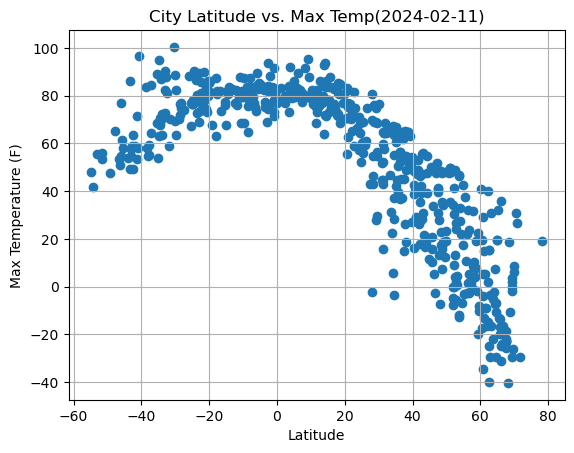

In [17]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temp(2024-02-11)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

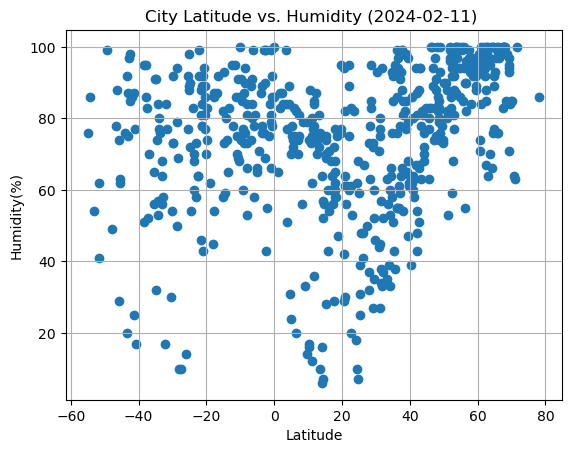

In [18]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (2024-02-11) ")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

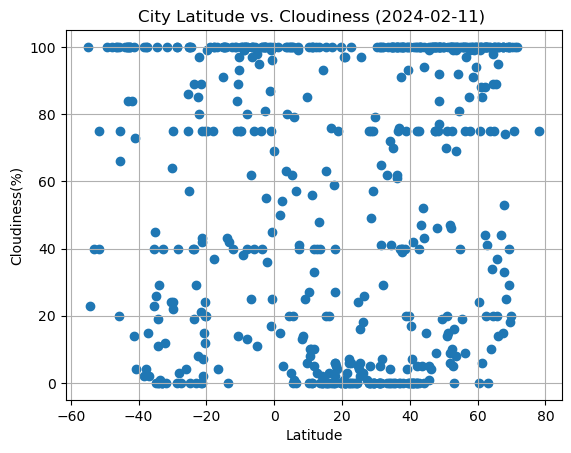

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (2024-02-11) ")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

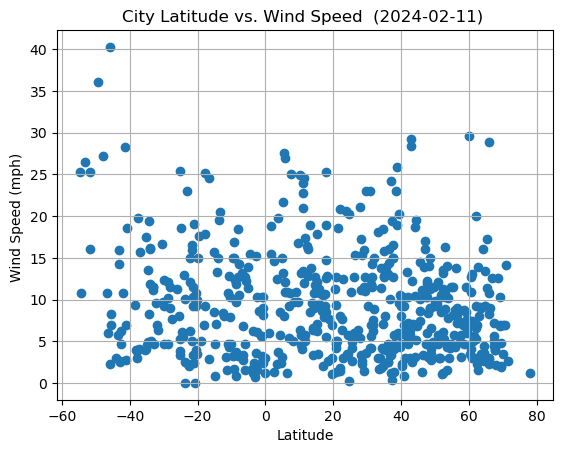

In [20]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph) ")
plt.title("City Latitude vs. Wind Speed  (2024-02-11) ")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots

# def regress (x,y):
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
#     regress_values = x * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.scatter(x,y)
#     plt.plot(x,regress_values,"r-")
#     plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san pedro pochutla,15.7333,-96.4667,87.89,43,0,11.30,MX,1707677871
1,uliastay,47.7417,96.8444,13.41,75,100,6.02,MN,1707677872
4,haiku-pauwela,20.9219,-156.3051,75.04,82,0,4.61,US,1707677875
5,zhaozhou,45.6833,125.3167,15.85,83,5,14.50,CN,1707677876
7,qaqortoq,60.7167,-46.0333,5.23,74,100,4.03,GL,1707677879


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,47.53,99,100,36.06,TF,1707677873
3,waitangi,-43.9535,-176.5597,53.82,76,100,3.00,NZ,1707677874
6,avarua,-21.2078,-159.7750,80.65,78,75,9.22,CK,1707677878
8,santiago de cao,-7.9589,-79.2392,78.93,73,13,12.66,PE,1707677880
12,adamstown,-25.0660,-130.1015,77.27,88,57,25.43,PN,1707677885


###  Temperature vs. Latitude Linear Regression Plot

-0.8773881419917657


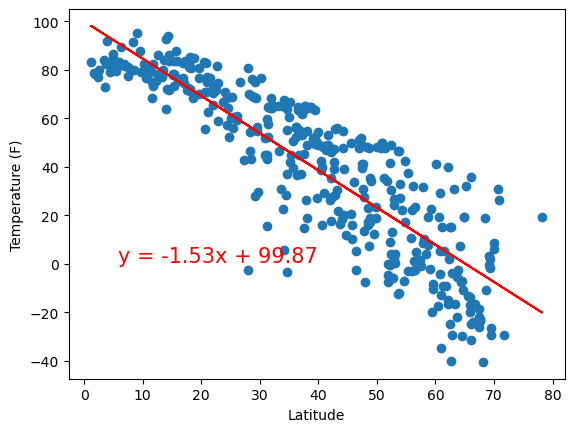

In [44]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(rvalue)

plt.show()

0.5956108716647794


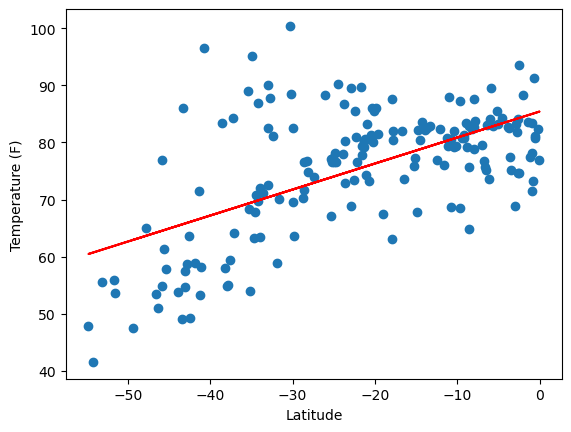

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(rvalue)
plt.show()

**Discussion about the linear relationship:** Strong correlation showing that average temperatures rise as we get closer to the equator, as expected.Interestingly, the correleation is weaker on the southern hemisphere data - this may reflect a lack of data as the plot is sparse compared to northern hemisphere dataplot.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.5088018684099244


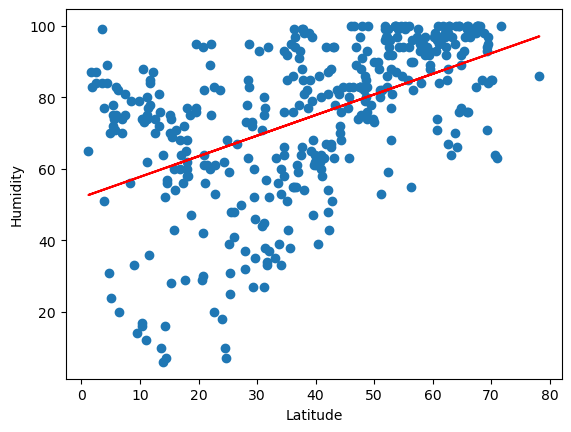

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print("The r-value is: ", rvalue)
plt.show()



The r-value is:  0.25353863339053245


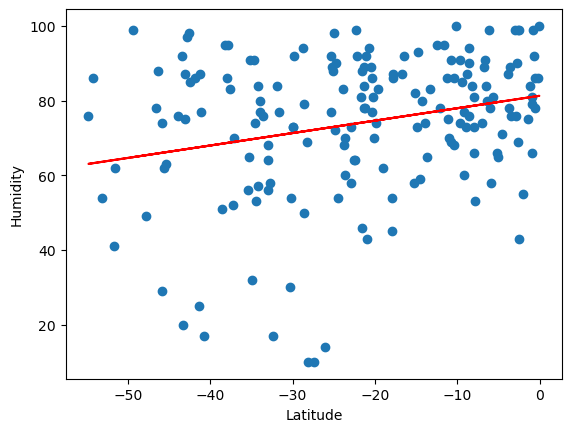

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print("The r-value is: ", rvalue)
plt.show()

**Discussion about the linear relationship:** Rather weak correlations here, the northern hemi relationship is interesting but most likely a mirage given it is barely above 0.5

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.3492549650233033


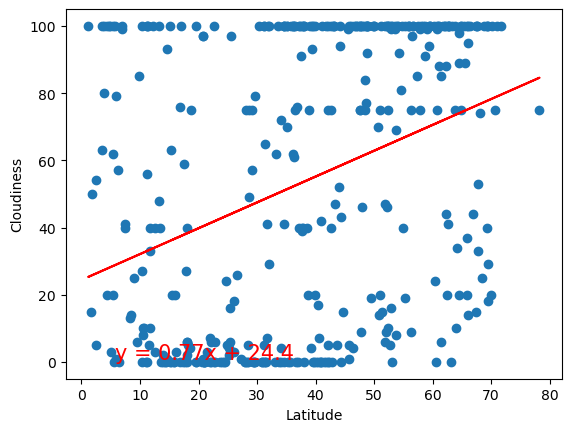

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print("The r-value is: ", rvalue)
plt.show()

The r-value is:  0.20296339247852327


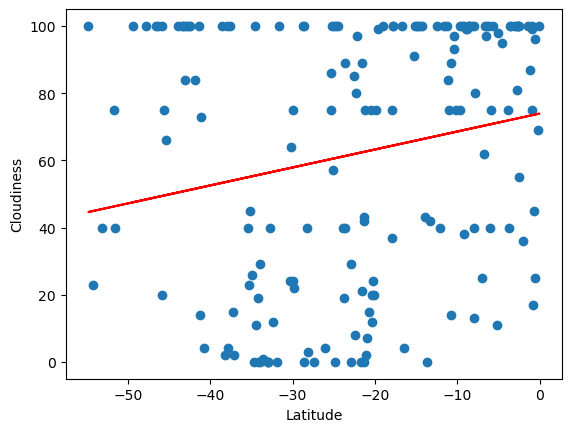

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print("The r-value is: ", rvalue)
plt.show()

**Discussion about the linear relationship:** A face seems to peer at us from the data. Otherwise, nothing to see here. No correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  -0.2092971260539469


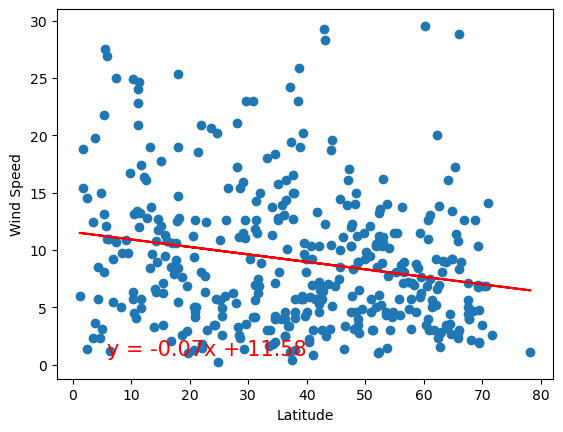

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print("The r-value is: ", rvalue)
plt.show()

The r-value is:  -0.28853958502883525


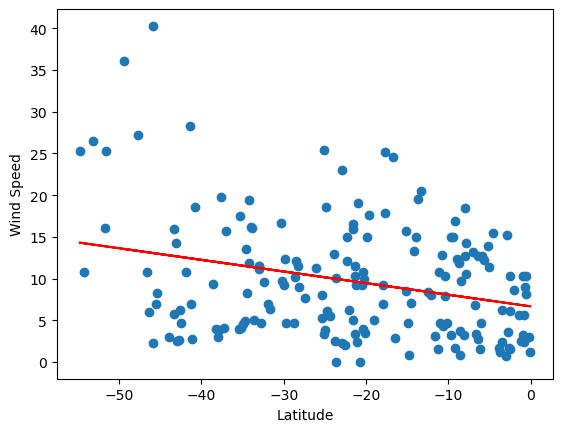

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print("The r-value is: ", rvalue)
plt.show()

**Discussion about the linear relationship:** Very weak correlations, but don't tell that to anyone who had to sail through the Straits of Magellan!